<a href="https://colab.research.google.com/github/kakkia/training_projects/blob/main/Netflix_Movie_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving NetflixOriginals.csv to NetflixOriginals.csv


# Movie Statistics Project

In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded["NetflixOriginals.csv"]),  encoding='ISO-8859-1')

In [4]:
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [ ]:
df.describe(include="all")

,Title,Genre,Premiere,Runtime,IMDB Score,Language
count,584,584,584,584.000000,584.000000,584
unique,584,115,390,NaN,NaN,38
top,Enter the Anime,Documentary,"October 2, 2020",NaN,NaN,English
freq,1,159,6,NaN,NaN,401
mean,NaN,NaN,NaN,93.577055,6.271747,NaN
std,NaN,NaN,NaN,27.761683,0.979256,NaN
min,NaN,NaN,NaN,4.000000,2.500000,NaN
25%,NaN,NaN,NaN,86.000000,5.700000,NaN
50%,NaN,NaN,NaN,97.000000,6.350000,NaN
75%,NaN,NaN,NaN,108.000000,7.000000,NaN


## Date

In [ ]:
# Column Premiere is a date but appears as object, I might transform to datetime
# I might only be interested in the year

df["Premiere"]

0         August 5, 2019
1        August 21, 2020
2      December 26, 2019
3       January 19, 2018
4       October 30, 2020
             ...        
579    December 31, 2018
580      October 9, 2015
581    December 16, 2018
582     December 8, 2020
583      October 4, 2020
Name: Premiere, Length: 584, dtype: object

In [5]:
df["Premiere"] = pd.to_datetime(df["Premiere"])

In [ ]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi


In [6]:
df['Premiere'] = df['Premiere'].dt.year
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020,81,2.6,Spanish
2,The App,Science fiction/Drama,2019,79,2.6,Italian
3,The Open House,Horror thriller,2018,94,3.2,English
4,Kaali Khuhi,Mystery,2020,90,3.4,Hindi


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    int64  
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 27.5+ KB


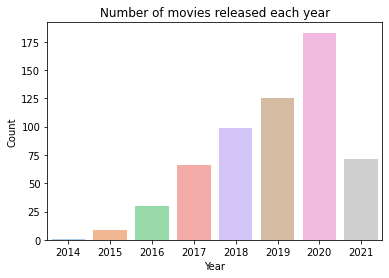

In [7]:
# How many movies premiered each year?

sns.set_palette("pastel")
sns.countplot(x='Premiere', data=df).set(xlabel= 'Year', ylabel ='Count', title='Number of movies released each year')
plt.show()
plt.close()

## Genre

In [ ]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020,81,2.6,Spanish
2,The App,Science fiction/Drama,2019,79,2.6,Italian
3,The Open House,Horror thriller,2018,94,3.2,English
4,Kaali Khuhi,Mystery,2020,90,3.4,Hindi


In [ ]:
df["Genre"].unique()

array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

In [8]:
df["Genre"] = df["Genre"].str.replace("-", " ")

In [ ]:
df.Genre

0                Documentary
1                   Thriller
2      Science fiction/Drama
3            Horror thriller
4                    Mystery
               ...          
579             Concert Film
580              Documentary
581             One man show
582              Documentary
583              Documentary
Name: Genre, Length: 584, dtype: object

In [9]:
# There are multiple genres in one column, I will split into multiple columns and chose the first genre for the description.

df[["Genre_a", "Genre_b", "Genre_c", "Genre_d"]] = df["Genre"].str.split("/", expand= True)
df.head() 

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Genre_a,Genre_b,Genre_c,Genre_d
0,Enter the Anime,Documentary,2019,58,2.5,English/Japanese,Documentary,None,None,None
1,Dark Forces,Thriller,2020,81,2.6,Spanish,Thriller,None,None,None
2,The App,Science fiction/Drama,2019,79,2.6,Italian,Science fiction,Drama,None,None
3,The Open House,Horror thriller,2018,94,3.2,English,Horror thriller,None,None,None
4,Kaali Khuhi,Mystery,2020,90,3.4,Hindi,Mystery,None,None,None


In [ ]:
df["Genre_a"].unique()

array(['Documentary', 'Thriller', 'Science fiction', 'Horror thriller',
       'Mystery', 'Action', 'Comedy', 'Heist film', 'Musical', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero Comedy', 'Horror',
       'Romance drama', 'Anime ', 'Superhero', 'Heist', 'Western',
       'Animation', 'Family film', 'Action thriller', 'Teen comedy drama',
       'Romantic drama', 'Aftershow ', 'Christmas musical',
       'Science fiction adventure', 'Variety show', 'Comedy drama',
       'Supernatural drama', 'Romantic teenage drama', 'Comedy ',
       'Crime drama', 'Psychological thriller drama', 'Adventure',
       'Black comedy', 'Romance', 'Horror comedy', 'Christian musical',
       'Romantic teen drama', 'Family', 'Dark comedy', 'Comedy horror',
       'Psychological thriller', 'Biopic', 'Mockumentary', 'Satire',
       'One man show', 'Romantic comedy drama', 'Fantasy', 'Sports drama',
       'Zombie', 'Psychological horror', 'S

In [10]:
df.drop(columns="Genre", inplace=True)

In [ ]:
df["Genre_a"].value_counts()

Documentary          159
Drama                 78
Comedy                51
Romantic comedy       40
Thriller              33
                    ... 
Sports film            1
Comedy mystery         1
Romantic thriller      1
Christmas comedy       1
Musical                1
Name: Genre_a, Length: 89, dtype: int64

In [11]:
df.drop(columns=["Genre_b", "Genre_c", "Genre_d"], inplace=True)

In [12]:
df.rename(columns={"Genre_a": "Genre"}, inplace=True)

In [13]:
df.head(10)

,Title,Premiere,Runtime,IMDB Score,Language,Genre
0,Enter the Anime,2019,58,2.5,English/Japanese,Documentary
1,Dark Forces,2020,81,2.6,Spanish,Thriller
2,The App,2019,79,2.6,Italian,Science fiction
3,The Open House,2018,94,3.2,English,Horror thriller
4,Kaali Khuhi,2020,90,3.4,Hindi,Mystery
5,Drive,2019,147,3.5,Hindi,Action
6,Leyla Everlasting,2020,112,3.7,Turkish,Comedy
7,The Last Days of American Crime,2020,149,3.7,English,Heist film
8,Paradox,2018,73,3.9,English,Musical
9,Sardar Ka Grandson,2021,139,4.1,Hindi,Comedy


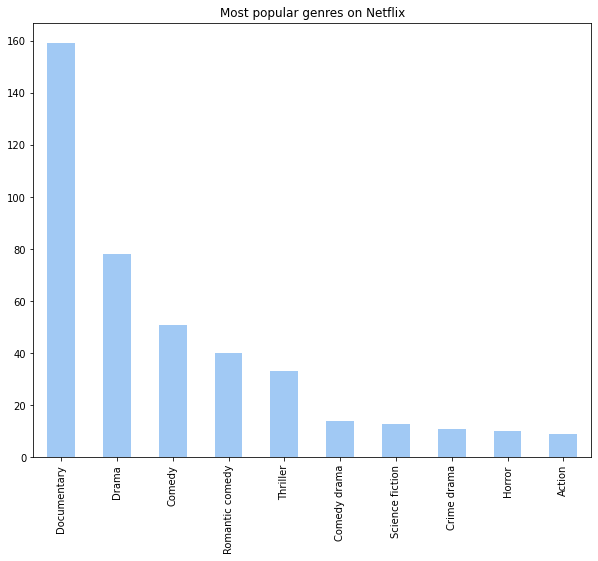

In [ ]:
# How many movies per genre?

plt.title('Most popular genres on Netflix')
df['Genre'].value_counts().head(10).plot(kind='bar', figsize=(10,8))
plt.show()

## Language


In [ ]:
df.Language.unique()

array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thia/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

In [14]:
# I am splitting the column Language into more columns because I am only interested in the first language of the film

df[["First_Language", "Second_language", "Third_language"]] = df["Language"].str.split("/", expand=True)
df

,Title,Premiere,Runtime,IMDB Score,Language,Genre,First_Language,Second_language,Third_language
0,Enter the Anime,2019,58,2.5,English/Japanese,Documentary,English,Japanese,None
1,Dark Forces,2020,81,2.6,Spanish,Thriller,Spanish,None,None
2,The App,2019,79,2.6,Italian,Science fiction,Italian,None,None
3,The Open House,2018,94,3.2,English,Horror thriller,English,None,None
4,Kaali Khuhi,2020,90,3.4,Hindi,Mystery,Hindi,None,None
...,...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,2018,125,8.4,English,Concert Film,English,None,None
580,Winter on Fire: Ukraine's Fight for Freedom,2015,91,8.4,English/Ukranian/Russian,Documentary,English,Ukranian,Russian
581,Springsteen on Broadway,2018,153,8.5,English,One man show,English,None,None
582,Emicida: AmarElo - It's All For Yesterday,2020,89,8.6,Portuguese,Documentary,Portuguese,None,None


In [ ]:
df.First_Language.unique()

array(['English', 'Spanish', 'Italian', 'Hindi', 'Turkish', 'Korean',
       'Indonesian', 'Malay', 'Dutch', 'French', 'Portuguese', 'Filipino',
       'German', 'Polish', 'Norwegian', 'Marathi', 'Thai', 'Swedish',
       'Japanese', 'Thia', 'Georgian', 'Bengali', 'Khmer', 'Tamil'],
      dtype=object)

In [ ]:
df.columns

Index(['Title', 'Premiere', 'Runtime', 'IMDB Score', 'Language', 'Genre',
       'First_Language', 'Second_language', 'Third_language'],
      dtype='object')

In [15]:
df.drop(columns=["Second_language", "Third_language"], inplace=True)

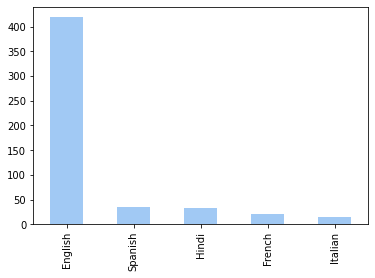

In [16]:
df['First_Language'].value_counts().head(5).plot(kind='bar')
plt.show()

In [17]:
df.drop(columns="Language", inplace=True)

In [ ]:
# Find number of films with First Language = English

df.loc[df["First_Language"] == "English"].count()

Title             419
Premiere          419
Runtime           419
IMDB Score        419
Genre             419
First_Language    419
dtype: int64

In [ ]:
print("Proportion of films with English as primary language:", round(419/584, 2) * 100)

Proportion of films with English as primary language: 72.0


In [ ]:
df.loc[df["First_Language"] != "English"].count()

Title             165
Premiere          165
Runtime           165
IMDB Score        165
Genre             165
First_Language    165
dtype: int64

In [ ]:
print("Ratio of English-language films to films in a single language that is NOT English:", round(419/165, 2))

Ratio of English-language films to films in a single language that is NOT English: 2.54


In [ ]:
df.loc[df["First_Language"] == "Italian"]

,Title,Premiere,Runtime,IMDB Score,Genre,First_Language
2,The App,2019,79,2.6,Science fiction,Italian
29,5 Star Christmas,2018,95,4.6,Comedy,Italian
35,The Players,2020,88,4.6,Comedy,Italian
41,The Binding,2020,93,4.7,Drama,Italian
82,The Beast,2020,99,5.2,Drama,Italian
106,Under the Riccione Sun,2020,101,5.4,Romantic teenage drama,Italian
135,The Last Paradiso,2021,107,5.6,Romantic drama,Italian
142,Caught by a Wave,2021,99,5.7,Romantic teen drama,Italian
206,Ultras,2020,108,5.9,Sports film,Italian
208,Forgive Us Our Debts,2018,104,6.0,Drama,Italian


In [ ]:
df.loc[df["First_Language"] == "French"]

,Title,Premiere,Runtime,IMDB Score,Genre,First_Language
28,The Misadventures of Hedi and Cokeman,2021,99,4.5,Comedy,French
32,Paris Is Us,2019,83,4.6,Romance drama,French
36,We Are One,2020,86,4.6,Documentary,French
39,Sentinelle,2021,80,4.7,Action,French
50,Earth and Blood,2020,80,4.9,Action,French
85,Back to School,2019,83,5.3,Comedy,French
89,The Most Assassinated Woman in the World,2018,102,5.3,Thriller,French
91,"To Each, Her Own",2018,95,5.3,Romantic comedy,French
102,Madame Claude,2021,112,5.4,Drama,French
201,The Decline,2020,83,5.9,Thriller,French


In [ ]:
df.loc[df["First_Language"] == "German"]

,Title,Premiere,Runtime,IMDB Score,Genre,First_Language
43,Christmas Crossfire,2020,106,4.8,Thriller,German
98,Freaks: You're One of Us,2020,92,5.4,Supernatural drama,German
178,Rising High,2020,94,5.8,Satire,German
189,What We Wanted,2020,93,5.8,Drama,German
300,Isi & Ossi,2020,113,6.4,Romantic comedy,German


The majority of Netflix films in the dataset have English as their primary language. With 419 English-language films out of a total of 584, this is about 72% of the films. Further, there are about 3 English-language films for every non-English single-language film. Only about 28% of films have a different primary languages. Spanish, Hindi, French, and Italian complete the top 5 primary languages of films on Netflix.

## IMDB Score

In [ ]:
max_score = df["IMDB Score"].max()
min_score = df["IMDB Score"].min()
range_score = max_score - min_score

print(max_score)
print(min_score)
print(range_score)


9.0
2.5
6.5


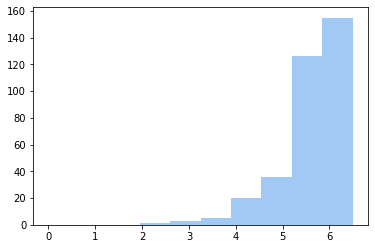

In [ ]:
plt.hist(df["IMDB Score"], range=(0, 6.5))
plt.show()

In [ ]:
# We conclude that the distribution of this variale is skewed and contains outliers 

print("Mean:", round(df["IMDB Score"].mean(), 2))
print("Median:", round(df["IMDB Score"].median(), 2))

Mean: 6.27
Median: 6.35


Highest scores vs lowest scores

In [ ]:
df.sort_values(by=["IMDB Score"], ascending=False).head()

,Title,Premiere,Runtime,IMDB Score,Genre,First_Language
583,David Attenborough: A Life on Our Planet,2020,83,9.0,Documentary,English
582,Emicida: AmarElo - It's All For Yesterday,2020,89,8.6,Documentary,Portuguese
581,Springsteen on Broadway,2018,153,8.5,One man show,English
580,Winter on Fire: Ukraine's Fight for Freedom,2015,91,8.4,Documentary,English
579,Taylor Swift: Reputation Stadium Tour,2018,125,8.4,Concert Film,English


In [ ]:
df.sort_values(by=["IMDB Score"]).head()

,Title,Premiere,Runtime,IMDB Score,Genre,First_Language
0,Enter the Anime,2019,58,2.5,Documentary,English
1,Dark Forces,2020,81,2.6,Thriller,Spanish
2,The App,2019,79,2.6,Science fiction,Italian
3,The Open House,2018,94,3.2,Horror thriller,English
4,Kaali Khuhi,2020,90,3.4,Mystery,Hindi


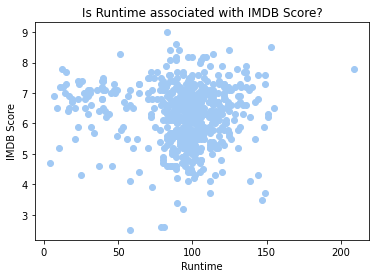

In [ ]:
# Is the IMDB Score influenced by other variables?
# First I will explore Runtime vs IMDB Score 

plt.title("Is Runtime associated with IMDB Score?")
plt.scatter(x= df["Runtime"], y= df["IMDB Score"])
plt.xlabel("Runtime")
plt.ylabel("IMDB Score")
plt.show()


In [ ]:
# We can conclude that we do not see a linear association between the two variables and we will confirm this with Pearson correlation close to 0.
from scipy.stats import pearsonr

correlation, p = pearsonr(df["Runtime"], y= df["IMDB Score"])
print("Correlation: ", correlation)

Correlation:  -0.0408962914207887


In [18]:
# Now I will explore if there is any association between Language and IMDB Score 

# Separate out scores for English and not English movies:
df_english = df["IMDB Score"][df["First_Language"] == "English"]
df_not_english = df["IMDB Score"][df["First_Language"] != "English"]

In [23]:
df_english

0      2.5
3      3.2
7      3.7
8      3.9
10     4.1
      ... 
578    8.4
579    8.4
580    8.4
581    8.5
583    9.0
Name: IMDB Score, Length: 419, dtype: float64

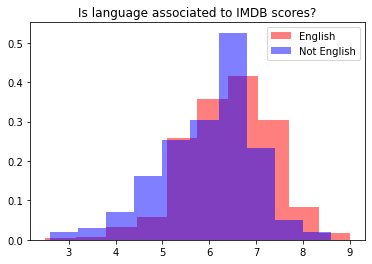

In [20]:
# Although English movies have higher scores, the overlap in the histogram suggests that the association between language and scores is relatively weak

plt.title("Is language associated to IMDB scores?")
plt.hist(df_english , color="red", density=True, label="English", alpha=0.5)
plt.hist(df_not_english , color="blue", density=True, label="Not English", alpha=0.5)
plt.legend()
plt.show()

In [21]:
# The mean and median difference is relatively small

mean_diff = np.mean(df_english) - np.mean(df_not_english)
print("Mean difference: ", mean_diff)

median_diff = np.median(df_english) - np.median(df_not_english)
print("Median difference: ", median_diff)

Mean difference:  0.42352932667968446
Median difference:  0.3000000000000007
